# 패키지 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [2]:
path = './data/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


# 데이터 살펴보기

## 컬럼 정보

- Survived: 생존 여부 / 0 = 사망, 1 = 생존
- Pclass: 티켓 등급 / 1 = 1등급, 2 = 2등급, 3 = 3등급
- Name: 이름 / (last name, Title, first name, middle name) 형식으로 구성
- Sex: 성별
- Age: 나이 / 1살 미만의 경우 분수, 추정 나이면 xx.5
- SibSp: 형제자매, 배우자 수
- Parch: 부모, 자녀 수
- Ticket: 티켓 번호
- Fare: 운임
- Cabin: 객실 번호
- Embarked: 탑승 선착장 / C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


train의 Age, Cabin, Embarked와 test의 Age, Fare, Cabin에 결측치가 있다.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## train test 병합

EDA와 데이터 전처리를 한 번에 하기 위해 train과 test를 병합합니다.

In [10]:
num_train = train.shape[0]
passenger_id = test['PassengerId']
df = pd.concat([train, test])
df.shape

(1309, 12)

# EDA
각 column과 생존률의 관계를 살펴보자.

EDA에서 시각화와 가능한 전처리까지 같이하기

## 상관관계 확인

우선 각 column의 상관관계를 확인해보자.

<Axes: >

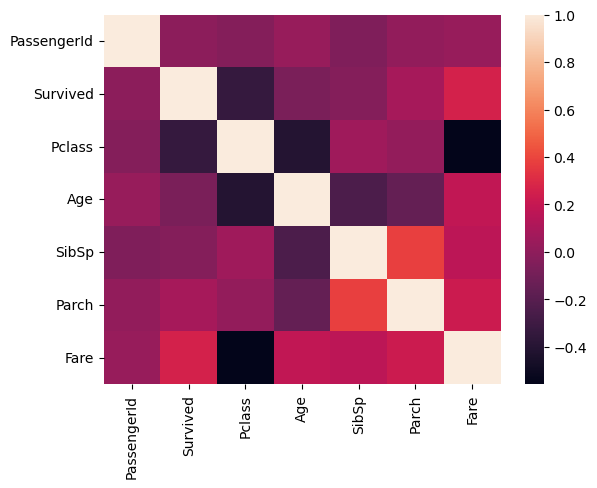

In [11]:
corr = df.corr()
sns.heatmap(corr)

## Survived

<Axes: >

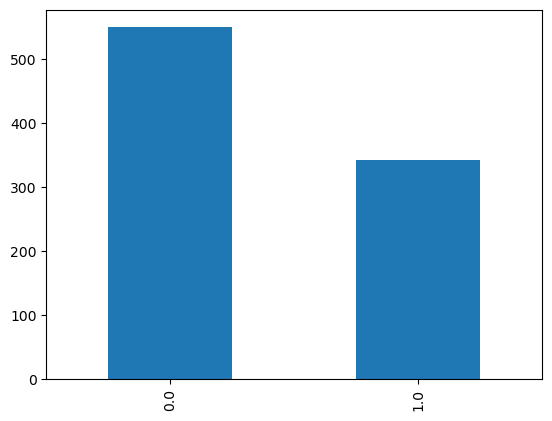

In [12]:
df.Survived.value_counts().plot(kind='bar')

## Pclass

티켓 등급별 생존률

In [13]:
pd.pivot_table(data=train, values='Survived', index='Pclass', aggfunc=['mean', 'sum', 'count'])

,mean,sum,count
,Survived,Survived,Survived
Pclass,,,
1,0.629630,136,216
2,0.472826,87,184
3,0.242363,119,491


티켓 등급과 셩별별 생존률

1등급과 2등급 티켓의 여성이 압도적으로 많이 살아남은 것을 볼 수 있다.

In [14]:
pd.pivot_table(data=train, values='Survived', index=['Pclass', 'Sex'], aggfunc=['mean', 'sum', 'count'])

mean      sum    count
               Survived Survived Survived
Pclass Sex                               
1      female  0.968085       91       94
       male    0.368852       45      122
2      female  0.921053       70       76
       male    0.157407       17      108
3      female  0.500000       72      144
       male    0.135447       47      347

티켓 등급별 평균 연령(결측치 미포함)

In [15]:
# train.groupby('Pclass')[['Age']].mean()
pd.pivot_table(data=df, values='Age', index='Pclass', aggfunc=['mean', 'count'])

,mean,count
,Age,Age
Pclass,,
1,39.159930,284
2,29.506705,261
3,24.816367,501


티켓 등급별 평균 운임

In [16]:
df.groupby('Pclass')[['Fare']].mean()

,Fare
Pclass,
1,87.508992
2,21.179196
3,13.302889


## Name

Name에서 Title(호칭)을 분리해 Title column으로 만들어줬다.

In [17]:
df['Title'] = df['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


Title(호칭)별 생존률

In [18]:
pd.pivot_table(data=df, values='Survived', index='Title', aggfunc=['mean', 'sum', 'count']).sort_values(('count', 'Survived'), ascending=False)

,mean,sum,count
,Survived,Survived,Survived
Title,,,
Mr,0.156673,81.0,517
Miss,0.697802,127.0,182
Mrs,0.792000,99.0,125
Master,0.575000,23.0,40
Dr,0.428571,3.0,7
Rev,0.000000,0.0,6
Mlle,1.000000,2.0,2
Major,0.500000,1.0,2


수가 적은 호칭들은 Rare라는 이름으로 합쳐줬다.

In [19]:
under_2_titles = ['Mlle', 'Major', 'Col', 'the Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer', 'Col', 'Rev', 'Ms', 'Dr', 'Dona']
under_2_titles

['Mlle',
 'Major',
 'Col',
 'the Countess',
 'Capt',
 'Ms',
 'Sir',
 'Lady',
 'Mme',
 'Don',
 'Jonkheer',
 'Col',
 'Rev',
 'Ms',
 'Dr',
 'Dona']

In [20]:
df['Title'] = df['Title'].replace(under_2_titles, 'Rare')

타이타닉에서의 Master는 어린 남자 아이를 가리키는 호칭으로 사용 되었다고 한다.

평균 나이 5.4세

In [21]:
df[df.Title == 'Master']['Age'].mean()

5.482641509433963

Master 호칭의 나이별 생존률

In [22]:
pd.pivot_table(data=df[df.Title == 'Master'], values='Survived', index=['Sex', 'Age'], aggfunc=['mean', 'count'])

mean    count
           Survived Survived
Sex  Age                    
male 0.42      1.00        1
     0.67      1.00        1
     0.83      1.00        2
     0.92      1.00        1
     1.00      0.60        5
     2.00      0.25        4
     3.00      1.00        4
     4.00      0.40        5
     6.00      1.00        1
     7.00      0.00        2
     8.00      0.50        2
     9.00      0.50        4
     10.00     0.00        1
     11.00     0.50        2
     12.00     1.00        1
     0.33       NaN        0
     0.75       NaN        0
     5.00       NaN        0
     11.50      NaN        0
     13.00      NaN        0
     14.50      NaN        0

각 호칭별 평균 나이

In [23]:
pd.pivot_table(data=df, values='Age', index=['Title'], aggfunc=['mean'])

,mean
,Age
Title,
Master,5.482642
Miss,21.774238
Mr,32.252151
Mrs,36.994118
Rare,42.656250


## Sex

남녀 생존률 비교

In [24]:
pd.pivot_table(data=train, values='Survived', index='Sex', aggfunc=['mean', 'sum', 'count'])

,mean,sum,count
,Survived,Survived,Survived
Sex,,,
female,0.742038,233,314
male,0.188908,109,577


남녀 평균 나이(나이 결측치 미반영)

In [25]:
df.groupby('Sex')[['Age']].mean()

,Age
Sex,
female,28.687088
male,30.585228


남녀 운임 비교

여자의 평균 운임이 확연이 더 높은 것을 알 수 있다. 왜그럴까?

In [26]:
df.groupby('Sex')[['Fare']].mean()

,Fare
Sex,
female,46.198097
male,26.154601


티켓 등급이 평균적으로 높아서 그런것일까 하고 티켓 등급별로 비교해봤다.

그러나 같은 티켓 안에서도 운임이 차이나는 것을 확인할 수 있다. 특히 1등급 여성의 티켓이 많이 차이난다.

In [27]:
pd.pivot_table(data=df, values='Fare', index=['Pclass', 'Sex'], aggfunc=['mean', 'count'])

mean count
                     Fare  Fare
Pclass Sex                     
1      female  109.412385   144
       male     69.888385   179
2      female   23.234827   106
       male     19.904946   171
3      female   15.324250   216
       male     12.415462   492

여성의 운임이 남성의 운임보다 비싼 이유는 여자가 남자보다 객실을 더 많이 예약한 것이 아닐까? 라는 가설 검증하기 위해 티켓 등급, 성별별 객실 예약 비율을 알아봤다.

In [28]:
df['isCabin'] = ~df['Cabin'].isna()

객실 데이터의 유무를 떠나, 1등급 여성의 운임이 평균적으로 높은 것을 확인할 수 있다.

In [29]:
pd.pivot_table(data=df, values=['Fare'], index=['Pclass', 'Sex', 'isCabin'], aggfunc=['mean', 'count'])

mean count
                             Fare  Fare
Pclass Sex    isCabin                  
1      female False    116.305791    23
              True     108.102068   121
       male   False     46.203030    44
              True      77.608056   135
2      female False     23.959677    93
              True      18.049362    13
       male   False     19.912810   161
              True      19.778330    10
3      female False     15.331003   209
              True      15.122614     7
       male   False     12.494977   483
              True       8.148156     9

## Age
결측치 263개 존재

In [30]:
df.Age.isna().sum()

263

나이대별 생존률 확인하기

나이대를 나타내는 "AgeRange" column 생성

In [31]:
AgeRange = df.Age//10*10 # 십의자리 내림 꼼수
AgeRange.value_counts().sort_index()

0.0      82
10.0    143
20.0    344
30.0    232
40.0    135
50.0     70
60.0     32
70.0      7
80.0      1
Name: Age, dtype: int64

70대 이상은 표본이 너무 작기 때문에 60 이상은 60으로 합침

In [32]:
AgeRange[AgeRange >= 60.0] = 60.0
AgeRange.value_counts().sort_index()

0.0      82
10.0    143
20.0    344
30.0    232
40.0    135
50.0     70
60.0     40
Name: Age, dtype: int64

df에 AgeRange column 추가

In [33]:
df['AgeRange'] = AgeRange
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,isCabin,AgeRange
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False,20.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True,30.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False,20.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True,30.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,False,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare,True,30.0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,False,30.0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,False,NaN


나이대별 생존률

In [34]:
df.groupby('AgeRange')[['Survived']].mean()

,Survived
AgeRange,
0.0,0.612903
10.0,0.401961
20.0,0.350000
30.0,0.437126
40.0,0.382022
50.0,0.416667
60.0,0.269231


나이 정보가 있는 사람들의 평균 생존률은 약 40%이다.

In [35]:
df.groupby('AgeRange')['Survived'].mean().mean()

0.4099870952043884

아래는 전체 생존률과 연령대별 생존률의 차이 수치이다.

10대 미만의 생존률이 평균보다 약 20% 높고, 60대 이상의 생존률이 평균보다 약 14% 떨어지는 것을 확인할 수 있다.

In [36]:
(df.groupby('AgeRange')[['Survived']].mean())-(df.groupby('AgeRange')['Survived'].mean().mean())

,Survived
AgeRange,
0.0,0.202916
10.0,-0.008026
20.0,-0.059987
30.0,0.027139
40.0,-0.027965
50.0,0.006680
60.0,-0.140756


## SibSp

형제자매와 배우자 수에 따른 생존률

In [37]:
pd.pivot_table(data=train, values='Survived', index='SibSp', aggfunc=['mean', 'sum', 'count'])

,mean,sum,count
,Survived,Survived,Survived
SibSp,,,
0,0.345395,210,608
1,0.535885,112,209
2,0.464286,13,28
3,0.250000,4,16
4,0.166667,3,18
5,0.000000,0,5
8,0.000000,0,7


## Parch

부모와 자식의 수에 따른 생존률

In [38]:
pd.pivot_table(data=train, values='Survived', index='Parch', aggfunc=['mean', 'sum', 'count'])

,mean,sum,count
,Survived,Survived,Survived
Parch,,,
0,0.343658,233,678
1,0.550847,65,118
2,0.500000,40,80
3,0.600000,3,5
4,0.000000,0,4
5,0.200000,1,5
6,0.000000,0,1


## SibSp + Parch = Family!
SibSp(형제자매, 배우자)와 Parch(부모, 자식)을 합쳐 Family column을 추가했다.

In [39]:
df['Family'] = df['SibSp'] + df['Parch']
df['Family'].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: Family, dtype: int64

가족 수에 따른 생존률

In [40]:
pd.pivot_table(data=df, values='Survived', index='Family', aggfunc=['mean', 'sum', 'count'])

,mean,sum,count
,Survived,Survived,Survived
Family,,,
0,0.303538,163.0,537
1,0.552795,89.0,161
2,0.578431,59.0,102
3,0.724138,21.0,29
4,0.200000,3.0,15
5,0.136364,3.0,22
6,0.333333,4.0,12
7,0.000000,0.0,6


## Ticket

중복되는 티켓들이 몇 가지 있다.

In [41]:
df['Ticket'].value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

중복되는 티켓의 개수

In [42]:
(df['Ticket'].value_counts()>1).sum()

216

## Fare

평균 운임은 33, 최소 운임은 0, 최대 운임은 512였다.

In [43]:
df.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

운임이 0인 데이터를 확인해보자.

티켓 등급은 각각 다르고, 전원 남자에 같이 탑승한 가족들은 없었고 전부 S 승선항에서 탑승했다.

생존률은 0.06%로 아주 처참하였다.

In [44]:
df[(df.Fare == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,isCabin,AgeRange,Family
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,False,30.0,0
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,True,40.0,0
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,False,20.0,0
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr,False,NaN,0
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,False,10.0,0
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr,False,NaN,0
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr,False,NaN,0
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr,False,NaN,0
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,False,40.0,0
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr,False,NaN,0


객실 데이터의 유무에 따른 요금을 비교해보았다.

In [45]:
print(f"객실이 NaN인 사람의 요금: {df.Fare[df.Cabin.isna()].mean()}")
print(f"객실이 있는 사람의 요금: {df.Fare[~df.Cabin.isna()].mean()}")

객실이 NaN인 사람의 요금: 19.132707206317864
객실이 있는 사람의 요금: 81.92899830508475


요금의 차이가 확연히 나는 것을 확인할 수 있었다.

그래서 Cabin이 NaN값인 사람들이 데이터가 기록되지 않은 것이 아닌 앉아서 가는 좌석만을 예매한 것이 아닐까? 라는 가설을 세워봤다.

그러나 자료를 조사해본 결과 타이타닉 호는 영국-미국의 장기 항해 배였고 빙산에 충돌하기 전까지 약 4일 이상을 항해했던 것으로 보아 승객의 객실 배정은 필수 요소였던 것으로 보인다.

결과적으로 객실이 NaN인 사람들도 모두 객실을 배정 받았을 것이다.

## Cabin

결측치 1014개 존재

In [46]:
df.Cabin.isna().sum()

1014

객실번호 맨 앞글자 알파벳은 층을 의미한다고 한다.

그래서 층별 승객 생존률을 알아보기 위해 Cabin 데이터에서 층 정보를 분리해 Floor column을 만들어줬다.

In [47]:
df['Floor'] = df.Cabin.str.extract('^([A-Za-z]+)')
df.Floor.value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Floor, dtype: int64

층별 승객 생존률

In [48]:
pd.pivot_table(data=df, values='Survived', index='Floor', aggfunc=['mean', 'sum', 'count'])

,mean,sum,count
,Survived,Survived,Survived
Floor,,,
A,0.466667,7.0,15
B,0.744681,35.0,47
C,0.593220,35.0,59
D,0.757576,25.0,33
E,0.750000,24.0,32
F,0.615385,8.0,13
G,0.500000,2.0,4
T,0.000000,0.0,1


티켓 등급별 객실 위치를 파악해보자

In [49]:
df.groupby('Pclass')['Floor'].value_counts()

Pclass  Floor
1       C        94
        B        65
        D        40
        E        34
        A        22
        T         1
2       F        13
        D         6
        E         4
3       F         8
        G         5
        E         3
Name: Floor, dtype: int64

## Embarked

결측치 2개 확인

In [50]:
df.Embarked.isna().sum()

2

승선항별 생존률 분석

In [51]:
pd.pivot_table(data=train, values='Survived', index='Embarked', aggfunc=['mean', 'sum', 'count'], sort=False)

,mean,sum,count
,Survived,Survived,Survived
Embarked,,,
S,0.336957,217,644
C,0.553571,93,168
Q,0.389610,30,77


승선항별 평균 티켓 등급과 요금

C는 평균 티켓 등굽과 운임이 높은 것을 보아 부자동네 근처일 것이라고 생각할 수 있다.

Q는 평균 티켓 등급이 2.9로 일반 서민 동네 근처라고 추론해볼 수 있다.

In [52]:
df.groupby('Embarked')[['Pclass', 'Fare']].mean()

,Pclass,Fare
Embarked,,
C,1.851852,62.336267
Q,2.894309,12.409012
S,2.347921,27.418824


In [53]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,isCabin,AgeRange,Family,Floor
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False,20.0,1,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True,30.0,1,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False,20.0,0,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True,30.0,1,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False,30.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,False,NaN,0,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare,True,30.0,0,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,False,30.0,0,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,False,NaN,0,NaN


# 전처리

## 결측치 채우기

In [54]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
isCabin           0
AgeRange        263
Family            0
Floor          1014
dtype: int64

### Age, AgeRange

Age의 결측치를 채울 때 Pclass와 Title을 고려하기로 했다. Title이 Master과 Rare인 사람은 표본 수가 너무 적어 Pclass별로 나누기 전의 평균으로 채워주고, 나머지는 Pclass를 고려해 평균으로 채워주겠다.

AgeRange도 채운 값에따라 갱신해주자.

In [55]:
pd.pivot_table(data=df, values='Age', index=['Pclass', 'Title'], aggfunc=['mean', 'count'])

mean count
                     Age   Age
Pclass Title                  
1      Master   6.984000     5
       Miss    30.338983    59
       Mr      41.450758   132
       Mrs     43.208955    67
       Rare    44.285714    21
2      Master   2.757273    11
       Miss    20.717083    48
       Mr      32.346715   137
       Mrs     33.518519    54
       Rare    39.545455    11
3      Master   6.090000    37
       Miss    17.360874   103
       Mr      28.318910   312
       Mrs     32.326531    49
       Rare          NaN     0

master 채우기

In [56]:
master_age = df[df['Title'] == 'Master']['Age'].mean()
master_age

5.482641509433963

In [57]:
df.loc[df['Title'] == 'Master', 'Age'] = df.loc[df['Title'] == 'Master', 'Age'].fillna(master_age)

Rare 채우기

In [58]:
rare_age = df[df['Title'] == 'Rare']['Age'].mean()
rare_age

42.65625

In [59]:
df.loc[df['Title'] == 'Rare', 'Age'] = df.loc[df['Title'] == 'Rare', 'Age'].fillna(rare_age)

나머지 채우기

In [60]:
arr = [[1,2,3], ['Mr','Miss','Mrs']]

In [61]:
for i in arr[0]:
    for j in arr[1]:
        age_mean = df.loc[(df.Pclass == i) & (df.Title == j), 'Age'].mean()
        df.loc[(df.Pclass == i) & (df.Title == j), 'Age'] = df.loc[(df.Pclass == i) & (df.Title == j), 'Age'].fillna(age_mean)


AgeRange 채우기

In [62]:
AgeRange = df.Age//10*10
AgeRange[AgeRange >= 60.0] = 60.0
df['AgeRange'] = AgeRange

### Embarked

티켓 번호가 같은 것을 보아 같은 승선항에서 탑승한 것으로 보인다.

In [63]:
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,isCabin,AgeRange,Family,Floor
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,True,30.0,0,B
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,True,60.0,0,B


다른 1등급 여성의 Embarked를 확인한 결과 S와 C의 수치가 가장 많기 때문에 최빈값인 S로 설정해줬다.

In [64]:
df[(df.Pclass == 1)&(df.Sex == 'female')]['Embarked'].value_counts()

C    71
S    69
Q     2
Name: Embarked, dtype: int64

In [65]:
df.Embarked = df.Embarked.fillna('S')
df.Embarked.isna().sum()

0

### Cabin, Floor, isCabin

Cabin과 Floor의 결측치 비율이 절반 이상이기 때문에 삭제하는게 낫다고 판단했다. 그리고 isCabin은 Cabin 결측치의 유무 데이터이므로 쓸모 없으니 날렸다.

In [66]:
df = df.drop(['Cabin', 'Floor', 'isCabin'], axis=1)

### test의 Fare

결측치가 한 개 이기 때문에 운임에 영향을 주는 요인인 Pclass, Sex, Embarked, Family를 고려한 평균값으로 채워줬다.

In [67]:
df[df.Fare.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeRange,Family
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,Mr,60.0,0


In [68]:
df.Fare = df.Fare.fillna(df[(df.Pclass == 3)&(df.Sex == 'male')&(df.Embarked == 'S')&(df.Family == 0)]['Fare'].mean())
df.Fare.isna().sum()

0

## 범주형 변수 수치형으로 변경

원핫, 라벨 인코더 사용 가능

Sex, Embarked, Title

In [69]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [70]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeRange,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr,20.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs,30.0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,20.0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs,30.0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,28.318910,0,0,A.5. 3236,8.0500,S,Mr,20.0,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,Rare,30.0,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,30.0,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,28.318910,0,0,359309,8.0500,S,Mr,20.0,0


In [71]:
df.Sex = df.Sex.map({'male':0, 'female':1})

In [72]:
df.Embarked = df.Embarked.map({'S':0, 'C':1, 'Q':2})

In [73]:
# df.Title = df.Title.map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Rare':4})
df.Title = LabelEncoder().fit_transform(df['Title'])

In [74]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeRange,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0,2,20.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1,3,30.0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0,1,20.0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0,3,30.0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0,2,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,28.318910,0,0,A.5. 3236,8.0500,0,2,20.0,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,1,4,30.0,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,0,2,30.0,0
416,1308,NaN,3,"Ware, Mr. Frederick",0,28.318910,0,0,359309,8.0500,0,2,20.0,0


## 사용하지 않는 열 삭제

PassengerId, Name, Ticket

In [75]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [76]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeRange,Family
0,0.0,3,0,22.000000,1,0,7.2500,0,2,20.0,1
1,1.0,1,1,38.000000,1,0,71.2833,1,3,30.0,1
2,1.0,3,1,26.000000,0,0,7.9250,0,1,20.0,0
3,1.0,1,1,35.000000,1,0,53.1000,0,3,30.0,1
4,0.0,3,0,35.000000,0,0,8.0500,0,2,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,0,28.318910,0,0,8.0500,0,2,20.0,0
414,NaN,1,1,39.000000,0,0,108.9000,1,4,30.0,0
415,NaN,3,0,38.500000,0,0,7.2500,0,2,30.0,0
416,NaN,3,0,28.318910,0,0,8.0500,0,2,20.0,0


# 모델링

## 데이터 split

결측치를 처리할 때 train과 test를 합쳐서 평균으로 해도 됨. 학습할 때만 test를 반영 안하면 됨.

In [77]:
train = df[:num_train]
test = df[num_train:]

In [78]:
train_X, train_y = train.drop('Survived', axis=1), train.Survived
test_X = test.drop('Survived', axis=1)

In [79]:
# from sklearn.model_selection import train_test_split

# train_test_split(train)

## 스케일링

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [81]:
train_X

array([[ 0.82737724, -0.73769513, -0.54980476, ...,  0.11674681,
        -0.32528085,  0.05915988],
       [-1.56610693,  1.35557354,  0.63456375, ...,  1.37001673,
         0.39388847,  0.05915988],
       [ 0.82737724,  1.35557354, -0.25371263, ..., -1.13652312,
        -0.32528085, -0.56097483],
       ...,
       [ 0.82737724,  1.35557354, -0.89320695, ..., -1.13652312,
        -1.04445017,  1.29942929],
       [-1.56610693, -0.73769513, -0.25371263, ...,  0.11674681,
        -0.32528085, -0.56097483],
       [ 0.82737724, -0.73769513,  0.19042556, ...,  0.11674681,
         0.39388847, -0.56097483]])

In [82]:
test_X

array([[ 0.82737724, -0.73769513,  0.37548314, ...,  0.11674681,
         0.39388847, -0.56097483],
       [ 0.82737724,  1.35557354,  1.30077104, ...,  1.37001673,
         1.1130578 ,  0.05915988],
       [-0.36936484, -0.73769513,  2.41111651, ...,  0.11674681,
         2.55139644, -0.56097483],
       ...,
       [ 0.82737724, -0.73769513,  0.67157527, ...,  0.11674681,
         0.39388847, -0.56097483],
       [ 0.82737724, -0.73769513, -0.08205986, ...,  0.11674681,
        -0.32528085, -0.56097483],
       [ 0.82737724, -0.73769513, -1.77246971, ..., -2.38979305,
        -1.76361949,  0.67929458]])

## 모델 import

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn import model_selection

from sklearn.metrics import accuracy_score

## 모델 학습

In [84]:
random_state = 42
cv_num = 5

In [85]:
models = {
    'lr' : LogisticRegression(random_state=random_state),
    'bayes' : GaussianNB(),
    'knn' : KNeighborsClassifier(),
    'svc' : SVC(probability=True, random_state=random_state),
    'tree' : DecisionTreeClassifier(random_state=random_state),
    'bag' : BaggingClassifier(random_state=random_state),
    'forest' : RandomForestClassifier(random_state=random_state),
    'ada' : AdaBoostClassifier(random_state=random_state),
    'gbc' : GradientBoostingClassifier(random_state=random_state),
    'xgb' : XGBClassifier(random_state=random_state),
    'lgbm' : LGBMClassifier(random_state=random_state),
    'cat' : CatBoostClassifier(random_state=random_state, verbose=False, allow_writing_files=False),
    # stk = StackingClassifier()
}

scores = {}

for name, model in models.items():
    model.fit(train_X, train_y)
    acc = cross_val_score(model, train_X, train_y, scoring = "accuracy", cv = cv_num)
    scores[name] = acc

In [86]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df.head(11)

,0,1,2,3,4,mean
gbc,0.837989,0.814607,0.876404,0.797753,0.842697,0.833890
cat,0.854749,0.814607,0.853933,0.792135,0.825843,0.828253
svc,0.832402,0.820225,0.814607,0.792135,0.865169,0.824907
lgbm,0.793296,0.825843,0.865169,0.797753,0.820225,0.820457
xgb,0.815642,0.808989,0.842697,0.775281,0.842697,0.817061
ada,0.787709,0.814607,0.808989,0.803371,0.848315,0.812598
forest,0.793296,0.803371,0.853933,0.758427,0.837079,0.809221
bag,0.815642,0.786517,0.848315,0.775281,0.820225,0.809196
knn,0.815642,0.792135,0.820225,0.803371,0.803371,0.806949
bayes,0.787709,0.786517,0.803371,0.814607,0.825843,0.803609


Text(0.5, 0, 'Accuracy Score (%)')

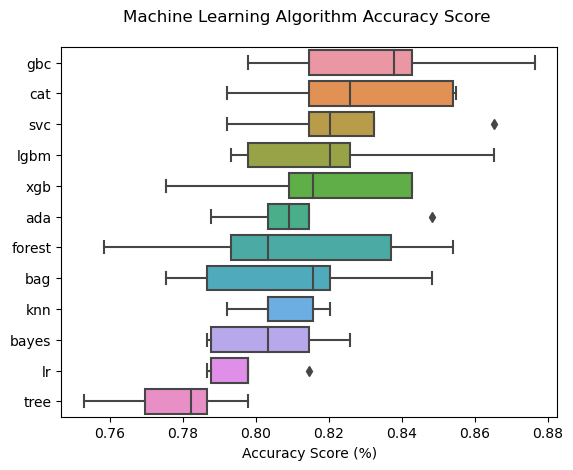

In [87]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')

## Feature 중요도, 차원축소

Text(0.5, 0, 'Importance Ratio (%)')

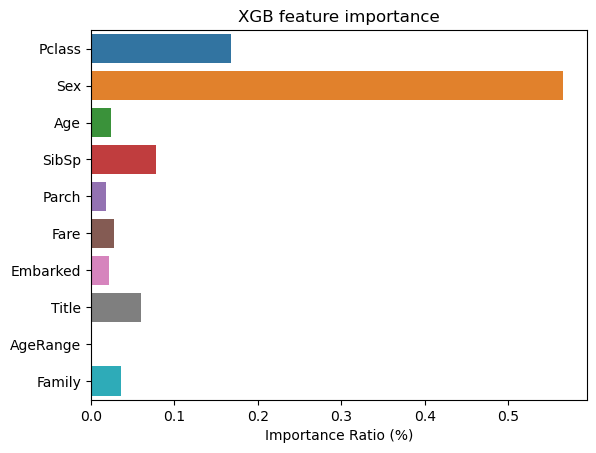

In [88]:
sns.barplot(x=models.get('xgb').feature_importances_, y=train.drop('Survived', axis=1).columns)
plt.title('XGB feature importance')
plt.xlabel('Importance Ratio (%)')

## 하이퍼 파라미터 튜닝

### GridSearchCV

In [89]:
# from sklearn.model_selection import GridSearchCV

In [90]:
# def grid_search(model, params):
#     gd = GridSearchCV(estimator=model, param_grid=params, verbose=False, 
#                         cv=cv_num, scoring="accuracy", n_jobs=-1)
    
#     gd.fit(train_X, train_y)
#     print('score:', gd.best_score_)
#     print('best params:', gd.best_params_)

In [91]:
# lr_params = {
#     'C': [0.01, 0.05, 0.1, 0.5, 1], # 규제 강도
#     'penalty': ['l1', 'l2'],
# }

# grid_search(models.get('lr'), lr_params)

In [92]:
# bayes_params = {
    
# }

# grid_search(models.get('bayes'), bayes_params)

In [93]:
# knn_params = {
#     'leaf_size': [1, 2, 5, 10],
#     'n_neighbors': [3, 5, 7, 9, 11],
#     'p': [1, 2],
#     'weights': ['uniform', 'distance']
# }

# grid_search(models.get('knn'), knn_params)

In [94]:
# svc_params = {
#     'C': [0.01, 0.05, 0.1, 0.5, 1],
#     'gamma': [0.01, 0.1, 1],
#     'kernel': ['linear', 'ploy', 'rbf'],
# }

# grid_search(models.get('svc'), svc_params)

In [95]:
# tree_params = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [2, 3, 5, None],
#     'min_samples_split': [2, 10, 50]
# }

# grid_search(models.get('tree'), tree_params)

In [96]:
# bag_params = {
#     'n_estimators': [10, 50, 100, 200],
#     'max_samples': [0.1, 0.5, 1.0],
#     'max_features': [0.1, 0.5, 1.0],
# }

# grid_search(models.get('bag'), bag_params)

In [97]:
# forest_params = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [2, 3, 5, None],
#     'min_samples_split': [2, 10, 50],
#     'n_estimators': [10, 50, 100, 200],
# }

# grid_search(models.get('forest'), forest_params)

In [98]:
# ada_params = {
#     'learning_rate': [0.1, 0.5, 1, 5, 10],
#     'n_estimators': [10, 50, 100, 200],
# }

# grid_search(models.get('ada'), ada_params)

In [99]:
# gbc_params = {
#     'learning_rate': [0.1, 0.5, 1, 5, 10],
#     'max_depth': [2, 3, 5, None],
#     'min_samples_split': [2, 10, 50],
#     'n_estimators': [10, 50, 100, 200],
# }

# grid_search(models.get('gbc'), gbc_params)

In [100]:
# xgb_params = {
#     'gamma': [0.001, 0.005, 0.01],
#     'learning_rate': [0.1, 0.3, 0.5, 1],
#     'max_depth': [2, 3, 5, None],
#     'min_child_weight': [1, 3, 5, 10],
#     'n_estimators': [10, 50, 100, 200],
# }

# grid_search(models.get('xgb'), xgb_params)

In [101]:
# lgbm_params = {
#     'learning_rate': [0.1, 0.3, 0.5, 1],
#     'max_depth': [2, 3, 5, None],
#     'n_estimators': [50, 100, 200],
#     'min_child_samples': [50, 100, 200],
# }

# grid_search(models.get('lgbm'), lgbm_params)

In [102]:
# cat_params = {
    
# }

# grid_search(models.get('cat'), cat_params)

### Optuna

In [103]:
import optuna

In [104]:
# # example
# def objective(trial):
#     optimizer = trial.suggest_categorical("optimizer", ["MomentumSGD", "Adam"])   # Categorical parameter
#     num_layers = trial.suggest_int("num_layers", 1, 3)                            # Integer parameter
#     num_channels = trial.suggest_int("num_channels", 32, 512, log=True)           # Integer parameter (log)
#     num_units = trial.suggest_int("num_units", 10, 100, step=5)                   # Integer parameter (discretized)
#     dropout_rate = trial.suggest_float("dropout_rate", 0.0, 1.0)                  # Floating point parameter
#     learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)    # Floating point parameter (log)
#     drop_path_rate = trial.suggest_float("drop_path_rate", 0.0, 1.0, step=0.1)    # Floating point parameter (discretized)

In [128]:
def objective(trial, name):
    if name == 'lr':
        param = {
            'C': trial.suggest_float('C', 0.01, 10.0), # 규제 강도, 값이 작아질 수록 강도가 강해짐, 양수여야 함
            'max_iter': trial.suggest_int('max_iter', 50, 1000, step=50), # 반복 횟수
            'random_state': random_state,
        }
        model = LogisticRegression(**param)
    elif name == 'nb':
        param = {
            'var_smoothing': trial.suggest_float('var_smoothing', 1e-10, 1.0) # 없는 값의 분류에 대한 최소값
        }
        model = GaussianNB(**param)
    elif name == 'knn':
        param = {
            'n_neighbors': trial.suggest_int('n_neighbors', 1, 15, step=2), # 이웃의 수
            'weights': trial.suggest_categorical('weights', ['uniform', 'distance']), # 가중치 설정, uniform은 동일한 가중치, distance는 멀수록 작아짐
            'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski']), # 거리 측정 알고리즘
        }
        model = KNeighborsClassifier(**param)
    elif name == 'svc':
        param = {
            'C': trial.suggest_float('C', 0.01, 10.0), # 규제 강도, 값이 작을수록 결정 경계가 곡선에 가까움
            'kernel': 'rbf', # 커널 유형
            'gamma': trial.suggest_categorical('gamma', ['scale', 'auto']), # 결정 경계의 유연도
            'probability': True, # 확률 추정 활성화, predict_proba 사용 가능
            'max_iter': trial.suggest_int('max_iter', 50, 1000, step=50), # 최대 반복 횟수
            'random_state': random_state,
        }
        model = SVC(**param)
    elif name == 'tree':
        param = {
            'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']), # 불순도 측정 알고리즘
            'max_depth': trial.suggest_int('max_depth', 2, 20, step=1), # 트리의 최대 깊이
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 50), # 노드를 split 하기 위한 최소 샘플 개수
            'min_samples_leaf': 1, # 노드에 필요한 최소 샘플 개수
            'max_features': trial.suggest_categorical('max_features', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), # 노드 분할에 사용할 feature 수
            'max_leaf_nodes': None, # 리프 노드의 최대 개수
            'random_state': random_state,
            
        }
        model = DecisionTreeClassifier(**param)
    elif name == 'bag':
        param = {
            'estimator': None, # 사용할 모델, 기본은 DecisionTreeClassifier
            'n_estimators': trial.suggest_int('n_estimators', 5, 200, step=5), # 생성할 약한 분류기의 수
            'max_features': trial.suggest_categorical('max_features', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), # 약한 분류기에서 사용할 feature의 비율
            'max_samples': trial.suggest_categorical('max_samples', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), # 약한 분류기에서 사용할 sample의 비율
            # 'bootstrap': True,
            'random_state': random_state,
            
        }
        model = BaggingClassifier(**param)
    elif name == 'forest':
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 5, 200, step=5), # 생성할 결정 트리의 수
            'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']), # 불순도 측정 알고리즘
            'max_depth': trial.suggest_int('max_depth', 2, 20, step=1), # 트리의 최대 깊이
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 50), # 노드를 split 하기 위한 최소 샘플 개수
            'min_samples_leaf': 1, # 노드에 필요한 최소 샘플 개수
            'max_features': trial.suggest_categorical('max_features', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), # 노드 분할에 사용할 feature 수
            'max_leaf_nodes': None, # 리프 노드의 최대 개수
            # 'bootstrap': True,
            'random_state': random_state,
            'max_samples': trial.suggest_categorical('max_samples', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), # 약한 분류기에서 사용할 sample의 비율
        }
        model = RandomForestClassifier(**param)
    elif name == 'ada':
        param = {
            'estimator': None, # 기본은 DecisionTreeClassifier
            'n_estimators': trial.suggest_int('n_estimators', 5, 200, step=5), # 약 분류기의 수
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0), # 학습률
            'random_state': random_state
        }
        model = AdaBoostClassifier(**param)
    elif name == 'gbc':
        param = {
            'loss': 'log_loss', # 비용 함수
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0), # 학습률
            'n_estimators': trial.suggest_int('n_estimators', 5, 200, step=5), # 약 분류기의 수
            'subsample': trial.suggest_categorical('subsample', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), # 약한 분류기에서 사용할 sample의 비율
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 50), # 노드를 split 하기 위한 최소 샘플 개수
            'min_samples_leaf': 1, # 노드에 필요한 최소 샘플 개수
            'max_depth': trial.suggest_int('max_depth', 2, 20, step=1), # 트리의 최대 깊이
            'max_features': trial.suggest_categorical('max_features', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), # 노드 분할에 사용할 feature 수
            'max_leaf_nodes': None, # 리프 노드의 최대 개수
            'random_state': random_state,
        }
        model = GradientBoostingClassifier(**param)
    elif name == 'xgb':
        param = {
            'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']), # 사용할 부스터의 종류
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0), # 학습률
            'gamma': trial.suggest_float('gamma', 0.001, 10.0), # leaf node의 분할을 결정하는 최소손실 감소 값
            'max_depth': trial.suggest_int('max_depth', 2, 20, step=1), # 트리의 최대 깊이
            'min_child_weight': 1, # 노드에 필요한 최소 샘플 개수
            'subsample': trial.suggest_categorical('subsample', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), # 약한 분류기에서 사용할 sample의 비율
            'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), # 노드 분할에 사용할 feature 수
            # 'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 1.0), # l1
            # 'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 1.0), # l2
            # 'scale_pos_weight': None, # 불균형 데이터에 사용
            'objective': 'binary:logistic', # 문제 종류, 회귀, 이진분류, 다중분류 등
            'eval_metric': None, # 평가 지표, default는 objective의 종류에 따름
            'n_estimators': trial.suggest_int('n_estimators', 5, 200, step=5), # 약 분류기의 수
            'random_state': random_state,
        }
        model = XGBClassifier(**param)
    elif name == 'lgbm':
        param = {
            'objective': None, # 문제 종류, 기본은 binary나 regression
            'boosting_type': 'gbdt', # 부스팅 타입
            'n_estimators': trial.suggest_int('n_estimators', 5, 200, step=5), # 약 분류기의 수
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0), # 학습률
            'max_depth': trial.suggest_int('max_depth', 2, 20, step=1), # 트리의 최대 깊이
            'min_child_samples': 1, # 리프 노드의 최소 샘플 수
            'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), # 노드 분할에 사용할 feature 수
            # 'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 1.0), # l1
            # 'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 1.0), # l2
            'subsample': trial.suggest_categorical('subsample', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), # 약한 분류기에서 사용할 sample의 비율
            'random_state': random_state,
        }
        model = LGBMClassifier(**param)
    elif name == 'cat':
        param = {
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0), # 학습률
            'max_depth': trial.suggest_int('max_depth', 2, 16, step=1), # 트리의 최대 깊이
            "n_estimators":trial.suggest_int("n_estimators", 5, 200, step=5), # 약 분류기의 수
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-10, 1.0), # l2 계수
            'random_strength': trial.suggest_float('random_strength', 0.001, 10.0), # 무작위성 파라미터
            'random_state': random_state,
            'verbose': False,
        }
        model = CatBoostClassifier(**param)

    score = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv_num)
    return score.mean()

In [106]:
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(lambda trial : objective(trial, 'lr'), n_trials=100)

print(f'Best score: {study_lr.best_trial.value},\nBest params: {study_lr.best_trial.params}')

display(optuna.visualization.plot_param_importances(study_lr))
display(optuna.visualization.plot_optimization_history(study_lr))

[I 2023-05-26 04:07:56,033] A new study created in memory with name: no-name-cde607ab-c90a-4ce3-861e-6d14db786f85
[I 2023-05-26 04:07:56,091] Trial 0 finished with value: 0.797991337643588 and parameters: {'C': 0.828503931434163, 'max_iter': 250}. Best is trial 0 with value: 0.797991337643588.
[I 2023-05-26 04:07:56,151] Trial 1 finished with value: 0.7957567007720796 and parameters: {'C': 2.180725770725765, 'max_iter': 650}. Best is trial 0 with value: 0.797991337643588.
[I 2023-05-26 04:07:56,213] Trial 2 finished with value: 0.7946331052664616 and parameters: {'C': 6.973675521045646, 'max_iter': 950}. Best is trial 0 with value: 0.797991337643588.
[I 2023-05-26 04:07:56,277] Trial 3 finished with value: 0.7946331052664616 and parameters: {'C': 4.335839372392945, 'max_iter': 600}. Best is trial 0 with value: 0.797991337643588.
[I 2023-05-26 04:07:56,329] Trial 4 finished with value: 0.79686774213797 and parameters: {'C': 0.7216987819684457, 'max_iter': 700}. Best is trial 0 with valu

Best score: 0.8047203565375682,
Best params: {'C': 0.032457554579799125, 'max_iter': 800}


In [107]:
study_nb = optuna.create_study(direction='maximize')
study_nb.optimize(lambda trial : objective(trial, 'nb'), n_trials=100)

print(f'Best score: {study_nb.best_trial.value},\nBest params: {study_nb.best_trial.params}')

display(optuna.visualization.plot_param_importances(study_nb))
display(optuna.visualization.plot_optimization_history(study_nb))

[I 2023-05-26 04:08:03,692] A new study created in memory with name: no-name-f4996f16-8c86-4896-8e01-549e9b1effa9
[I 2023-05-26 04:08:03,712] Trial 0 finished with value: 0.8091959073504487 and parameters: {'var_smoothing': 0.7323775133429519}. Best is trial 0 with value: 0.8091959073504487.
[I 2023-05-26 04:08:03,727] Trial 1 finished with value: 0.7767057937354842 and parameters: {'var_smoothing': 0.9613843450759509}. Best is trial 0 with value: 0.8091959073504487.
[I 2023-05-26 04:08:03,741] Trial 2 finished with value: 0.7789467076768564 and parameters: {'var_smoothing': 0.9523487886145087}. Best is trial 0 with value: 0.8091959073504487.
[I 2023-05-26 04:08:03,757] Trial 3 finished with value: 0.80248571966606 and parameters: {'var_smoothing': 0.21902296334040125}. Best is trial 0 with value: 0.8091959073504487.
[I 2023-05-26 04:08:03,773] Trial 4 finished with value: 0.8047329106772958 and parameters: {'var_smoothing': 0.18141629193985784}. Best is trial 0 with value: 0.809195907

Best score: 0.8114430983616847,
Best params: {'var_smoothing': 0.7361593777644188}


In [108]:
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(lambda trial : objective(trial, 'knn'), n_trials=100)

print(f'Best score: {study_knn.best_trial.value},\nBest params: {study_knn.best_trial.params}')

display(optuna.visualization.plot_param_importances(study_knn))
display(optuna.visualization.plot_optimization_history(study_knn))

[I 2023-05-26 04:08:06,002] A new study created in memory with name: no-name-c208666d-b4d8-4451-9314-01c768deb27c
[I 2023-05-26 04:08:06,079] Trial 0 finished with value: 0.8069738246186681 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 0 with value: 0.8069738246186681.
[I 2023-05-26 04:08:06,109] Trial 1 finished with value: 0.7979662293641328 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 0 with value: 0.8069738246186681.
[I 2023-05-26 04:08:06,137] Trial 2 finished with value: 0.792348251836043 and parameters: {'n_neighbors': 13, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.8069738246186681.
[I 2023-05-26 04:08:06,158] Trial 3 finished with value: 0.7429853744272173 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 0 with value: 0.8069738246186681.
[I 2023-05-26 04:08:06,205] Trial 4 finished with value: 0.742

Best score: 0.8136965664427847,
Best params: {'n_neighbors': 13, 'weights': 'uniform', 'metric': 'minkowski'}


In [109]:
study_svc = optuna.create_study(direction='maximize')
study_svc.optimize(lambda trial : objective(trial, 'svc'), n_trials=100)

print(f'Best score: {study_svc.best_trial.value},\nBest params: {study_svc.best_trial.params}')

display(optuna.visualization.plot_param_importances(study_svc))
display(optuna.visualization.plot_optimization_history(study_svc))

[I 2023-05-26 04:08:11,928] A new study created in memory with name: no-name-436d6787-bdef-4801-bafc-0979043d84fd
[I 2023-05-26 04:08:12,390] Trial 0 finished with value: 0.8282719226664993 and parameters: {'C': 1.4037824730467592, 'gamma': 'scale', 'max_iter': 350}. Best is trial 0 with value: 0.8282719226664993.
[I 2023-05-26 04:08:12,826] Trial 1 finished with value: 0.821542903772519 and parameters: {'C': 3.7051366119184963, 'gamma': 'scale', 'max_iter': 900}. Best is trial 0 with value: 0.8282719226664993.
[I 2023-05-26 04:08:13,280] Trial 2 finished with value: 0.8170610758897746 and parameters: {'C': 6.056057334576371, 'gamma': 'scale', 'max_iter': 800}. Best is trial 0 with value: 0.8282719226664993.
[I 2023-05-26 04:08:13,720] Trial 3 finished with value: 0.810344611135522 and parameters: {'C': 8.131742953301458, 'gamma': 'scale', 'max_iter': 850}. Best is trial 0 with value: 0.8282719226664993.
[I 2023-05-26 04:08:14,108] Trial 4 finished with value: 0.8170673529596384 and pa

Best score: 0.8349883874207521,
Best params: {'C': 0.6315223551554094, 'gamma': 'scale', 'max_iter': 1000}


In [110]:
study_tree = optuna.create_study(direction='maximize')
study_tree.optimize(lambda trial : objective(trial, 'tree'), n_trials=200)

print(f'Best score: {study_tree.best_trial.value},\nBest params: {study_tree.best_trial.params}')

display(optuna.visualization.plot_param_importances(study_tree))
display(optuna.visualization.plot_optimization_history(study_tree))

[I 2023-05-26 04:09:00,126] A new study created in memory with name: no-name-f9a8a2ce-8236-45a0-b927-9411fa63d3df
[I 2023-05-26 04:09:00,146] Trial 0 finished with value: 0.7923733601154981 and parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 15, 'max_features': 0.5}. Best is trial 0 with value: 0.7923733601154981.
[I 2023-05-26 04:09:00,167] Trial 1 finished with value: 0.8125792480070302 and parameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 37, 'max_features': 1.0}. Best is trial 1 with value: 0.8125792480070302.
[I 2023-05-26 04:09:00,187] Trial 2 finished with value: 0.8193145439708743 and parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7, 'max_features': 0.7}. Best is trial 2 with value: 0.8193145439708743.
[I 2023-05-26 04:09:00,209] Trial 3 finished with value: 0.7856506182913815 and parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 36, 'max_features': 0.6}. Best is trial 2 with value: 0.8

Best score: 0.8226602222082733,
Best params: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 5, 'max_features': 1.0}


In [111]:
study_bag = optuna.create_study(direction='maximize')
study_bag.optimize(lambda trial : objective(trial, 'bag'), n_trials=100)

print(f'Best score: {study_bag.best_trial.value},\nBest params: {study_bag.best_trial.params}')

display(optuna.visualization.plot_param_importances(study_bag))
display(optuna.visualization.plot_optimization_history(study_bag))

[I 2023-05-26 04:09:08,804] A new study created in memory with name: no-name-c5ff7eaa-a775-487c-a3a8-ab97f72cdc01
[I 2023-05-26 04:09:09,421] Trial 0 finished with value: 0.8013558470905782 and parameters: {'n_estimators': 45, 'max_features': 0.9, 'max_samples': 0.8}. Best is trial 0 with value: 0.8013558470905782.
[I 2023-05-26 04:09:10,738] Trial 1 finished with value: 0.8181909484652564 and parameters: {'n_estimators': 110, 'max_features': 1.0, 'max_samples': 0.6}. Best is trial 1 with value: 0.8181909484652564.
[I 2023-05-26 04:09:11,733] Trial 2 finished with value: 0.8350260498399347 and parameters: {'n_estimators': 90, 'max_features': 0.5, 'max_samples': 1.0}. Best is trial 2 with value: 0.8350260498399347.
[I 2023-05-26 04:09:13,484] Trial 3 finished with value: 0.8383780051471973 and parameters: {'n_estimators': 155, 'max_features': 0.5, 'max_samples': 1.0}. Best is trial 3 with value: 0.8383780051471973.
[I 2023-05-26 04:09:14,915] Trial 4 finished with value: 0.8271483271608

Best score: 0.8406251961584333,
Best params: {'n_estimators': 180, 'max_features': 0.5, 'max_samples': 1.0}


In [112]:
study_forest = optuna.create_study(direction='maximize')
study_forest.optimize(lambda trial : objective(trial, 'forest'), n_trials=200)

print(f'Best score: {study_forest.best_trial.value},\nBest params: {study_forest.best_trial.params}')

display(optuna.visualization.plot_param_importances(study_forest))
display(optuna.visualization.plot_optimization_history(study_forest))

[I 2023-05-26 04:11:50,188] A new study created in memory with name: no-name-0975067f-b1b6-4165-a4b5-a820d1b25038
[I 2023-05-26 04:11:51,672] Trial 0 finished with value: 0.8395204318624068 and parameters: {'n_estimators': 145, 'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 5, 'max_features': 0.6, 'max_samples': 0.9}. Best is trial 0 with value: 0.8395204318624068.
[I 2023-05-26 04:11:53,412] Trial 1 finished with value: 0.8361747536250078 and parameters: {'n_estimators': 190, 'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 4, 'max_features': 1.0, 'max_samples': 0.6}. Best is trial 0 with value: 0.8395204318624068.
[I 2023-05-26 04:11:54,286] Trial 2 finished with value: 0.8294206264515724 and parameters: {'n_estimators': 90, 'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 29, 'max_features': 0.6, 'max_samples': 0.9}. Best is trial 0 with value: 0.8395204318624068.
[I 2023-05-26 04:11:55,988] Trial 3 finished with value: 0.817079907099366 and paramet

Best score: 0.8484903646977591,
Best params: {'n_estimators': 165, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 7, 'max_features': 0.7, 'max_samples': 0.8}


In [113]:
study_ada = optuna.create_study(direction='maximize')
study_ada.optimize(lambda trial : objective(trial, 'ada'), n_trials=100)

print(f'Best score: {study_ada.best_trial.value},\nBest params: {study_ada.best_trial.params}')

display(optuna.visualization.plot_param_importances(study_ada))
display(optuna.visualization.plot_optimization_history(study_ada))

[I 2023-05-26 04:16:56,942] A new study created in memory with name: no-name-f4dafe32-4809-4122-b25a-439b656edb00
[I 2023-05-26 04:16:57,195] Trial 0 finished with value: 0.7867365513778168 and parameters: {'n_estimators': 25, 'learning_rate': 0.07279845264190186}. Best is trial 0 with value: 0.7867365513778168.
[I 2023-05-26 04:16:58,357] Trial 1 finished with value: 0.8170924612390935 and parameters: {'n_estimators': 130, 'learning_rate': 0.6211652596964196}. Best is trial 1 with value: 0.8170924612390935.
[I 2023-05-26 04:16:59,750] Trial 2 finished with value: 0.8159688657334756 and parameters: {'n_estimators': 160, 'learning_rate': 0.4855398300158258}. Best is trial 1 with value: 0.8170924612390935.
[I 2023-05-26 04:16:59,965] Trial 3 finished with value: 0.821542903772519 and parameters: {'n_estimators': 20, 'learning_rate': 0.3447954262129601}. Best is trial 3 with value: 0.821542903772519.
[I 2023-05-26 04:17:00,161] Trial 4 finished with value: 0.8182160567447117 and parameter

Best score: 0.8327851358985626,
Best params: {'n_estimators': 165, 'learning_rate': 0.9972445804228764}


In [126]:
study_gbc = optuna.create_study(direction='maximize')
study_gbc.optimize(lambda trial : objective(trial, 'gbc'), n_trials=100)

print(f'Best score: {study_gbc.best_trial.value},\nBest params: {study_gbc.best_trial.params}')

display(optuna.visualization.plot_param_importances(study_gbc))
display(optuna.visualization.plot_optimization_history(study_gbc))

[I 2023-05-26 04:46:14,189] A new study created in memory with name: no-name-84d575fd-fced-42d6-83c3-d6f83cd3517e
[I 2023-05-26 04:46:14,734] Trial 0 finished with value: 0.8226853304877283 and parameters: {'learning_rate': 0.29728501495245574, 'n_estimators': 110, 'subsample': 0.5, 'min_samples_split': 48, 'max_depth': 3, 'max_features': 0.7}. Best is trial 0 with value: 0.8226853304877283.
[I 2023-05-26 04:46:15,414] Trial 1 finished with value: 0.7845081915761721 and parameters: {'learning_rate': 0.5440459419716874, 'n_estimators': 80, 'subsample': 0.5, 'min_samples_split': 40, 'max_depth': 18, 'max_features': 0.7}. Best is trial 0 with value: 0.8226853304877283.
[I 2023-05-26 04:46:16,706] Trial 2 finished with value: 0.5948465256418304 and parameters: {'learning_rate': 0.86907122338339, 'n_estimators': 115, 'subsample': 0.7, 'min_samples_split': 40, 'max_depth': 17, 'max_features': 0.7}. Best is trial 0 with value: 0.8226853304877283.
[I 2023-05-26 04:46:18,299] Trial 3 finished w

Best score: 0.8428723871696693,
Best params: {'learning_rate': 0.25119979791242764, 'n_estimators': 105, 'subsample': 0.8, 'min_samples_split': 24, 'max_depth': 2, 'max_features': 1.0}


In [115]:
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(lambda trial : objective(trial, 'xgb'), n_trials=100)

print(f'Best score: {study_xgb.best_trial.value},\nBest params: {study_xgb.best_trial.params}')

display(optuna.visualization.plot_param_importances(study_xgb))
display(optuna.visualization.plot_optimization_history(study_xgb))

[I 2023-05-26 04:20:11,318] A new study created in memory with name: no-name-00c48b2d-1bbf-49a8-b912-4a2ab9d738a5
[I 2023-05-26 04:20:11,910] Trial 0 finished with value: 0.8203879229175822 and parameters: {'booster': 'dart', 'learning_rate': 0.4902295196216368, 'gamma': 7.839477299413202, 'max_depth': 2, 'subsample': 0.9, 'colsample_bytree': 0.5, 'n_estimators': 30}. Best is trial 0 with value: 0.8203879229175822.
[I 2023-05-26 04:20:12,909] Trial 1 finished with value: 0.8249011361496453 and parameters: {'booster': 'dart', 'learning_rate': 0.9787008192335235, 'gamma': 7.1048916905773565, 'max_depth': 3, 'subsample': 0.9, 'colsample_bytree': 0.9, 'n_estimators': 40}. Best is trial 1 with value: 0.8249011361496453.
[I 2023-05-26 04:20:14,548] Trial 2 finished with value: 0.8215303496327915 and parameters: {'booster': 'gbtree', 'learning_rate': 0.13480248216266524, 'gamma': 9.370712559150345, 'max_depth': 15, 'subsample': 0.9, 'colsample_bytree': 0.6, 'n_estimators': 175}. Best is trial

Best score: 0.844002259745151,
Best params: {'booster': 'dart', 'learning_rate': 0.40508069064508057, 'gamma': 2.7853259113507467, 'max_depth': 4, 'subsample': 0.7, 'colsample_bytree': 1.0, 'n_estimators': 25}


In [116]:
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(lambda trial : objective(trial, 'lgbm'), n_trials=200)

print(f'Best score: {study_lgbm.best_trial.value},\nBest params: {study_lgbm.best_trial.params}')

display(optuna.visualization.plot_param_importances(study_lgbm))
display(optuna.visualization.plot_optimization_history(study_lgbm))

[I 2023-05-26 04:24:47,154] A new study created in memory with name: no-name-c745716e-d78f-4cd7-a361-5f8e8ad173dd
[I 2023-05-26 04:24:48,480] Trial 0 finished with value: 0.7923859142552256 and parameters: {'n_estimators': 160, 'learning_rate': 0.7186940037503555, 'max_depth': 15, 'colsample_bytree': 0.5, 'subsample': 0.9}. Best is trial 0 with value: 0.7923859142552256.
[I 2023-05-26 04:24:48,811] Trial 1 finished with value: 0.8024857196660597 and parameters: {'n_estimators': 45, 'learning_rate': 0.560114243926489, 'max_depth': 5, 'colsample_bytree': 1.0, 'subsample': 0.5}. Best is trial 1 with value: 0.8024857196660597.
[I 2023-05-26 04:24:49,604] Trial 2 finished with value: 0.8035904839620865 and parameters: {'n_estimators': 140, 'learning_rate': 0.3458979007467588, 'max_depth': 5, 'colsample_bytree': 0.5, 'subsample': 1.0}. Best is trial 2 with value: 0.8035904839620865.
[I 2023-05-26 04:24:49,904] Trial 3 finished with value: 0.803577929822359 and parameters: {'n_estimators': 25

Best score: 0.8440148138848785,
Best params: {'n_estimators': 30, 'learning_rate': 0.06533593457606035, 'max_depth': 12, 'colsample_bytree': 0.8, 'subsample': 0.7}


In [129]:
study_cat = optuna.create_study(direction='maximize')
study_cat.optimize(lambda trial : objective(trial, 'cat'), n_trials=100)

print(f'Best score: {study_cat.best_trial.value},\nBest params: {study_cat.best_trial.params}')

display(optuna.visualization.plot_param_importances(study_cat))
display(optuna.visualization.plot_optimization_history(study_cat))

[I 2023-05-26 04:49:52,308] A new study created in memory with name: no-name-2ff4b838-b44e-45b2-b40c-0cdd5a8b5646
[I 2023-05-26 04:49:53,644] Trial 0 finished with value: 0.8204067541271733 and parameters: {'learning_rate': 0.45537041229291647, 'max_depth': 9, 'n_estimators': 55, 'l2_leaf_reg': 0.8219187642993405, 'random_strength': 9.890356357214964}. Best is trial 0 with value: 0.8204067541271733.
[I 2023-05-26 04:49:53,965] Trial 1 finished with value: 0.8383842822170611 and parameters: {'learning_rate': 0.7267058125019545, 'max_depth': 3, 'n_estimators': 55, 'l2_leaf_reg': 0.8715042256149983, 'random_strength': 0.8905399415432669}. Best is trial 1 with value: 0.8383842822170611.
[I 2023-05-26 04:49:54,854] Trial 2 finished with value: 0.8260121775155358 and parameters: {'learning_rate': 0.5910267020279698, 'max_depth': 9, 'n_estimators': 35, 'l2_leaf_reg': 0.6419940513703402, 'random_strength': 3.0024841646161247}. Best is trial 1 with value: 0.8383842822170611.
[I 2023-05-26 04:49

Best score: 0.8507375557089951,
Best params: {'learning_rate': 0.1440900095514001, 'max_depth': 7, 'n_estimators': 110, 'l2_leaf_reg': 0.9625206886049872, 'random_strength': 3.058797700493502}


## 모델 재학습

In [138]:
study_lr.best_params

{'C': 0.032457554579799125, 'max_iter': 800}

In [141]:
models = {
    'lr' : LogisticRegression(**study_lr.best_params, random_state=random_state),
    'nb' : GaussianNB(**study_nb.best_params),
    'knn' : KNeighborsClassifier(**study_knn.best_params),
    'svc' : SVC(**study_svc.best_params, probability=True, random_state=random_state),
    'tree' : DecisionTreeClassifier(**study_tree.best_params, random_state=random_state),
    'bag' : BaggingClassifier(**study_bag.best_params, random_state=random_state),
    'forest' : RandomForestClassifier(**study_forest.best_params, random_state=random_state),
    'ada' : AdaBoostClassifier(**study_ada.best_params, random_state=random_state),
    'gbc' : GradientBoostingClassifier(**study_gbc.best_params, random_state=random_state),
    'xgb' : XGBClassifier(**study_xgb.best_params, random_state=random_state),
    'lgbm' : LGBMClassifier(**study_lgbm.best_params, random_state=random_state),
    'cat' : CatBoostClassifier(**study_cat.best_params, verbose=False, random_state=random_state),
}

scores2 = {}

for name, model in models.items():
    model.fit(train_X, train_y)
    acc = cross_val_score(model, train_X, train_y, scoring = "accuracy", cv = cv_num)
    scores2[name] = acc

Text(0.5, 0, 'Accuracy Score (%)')

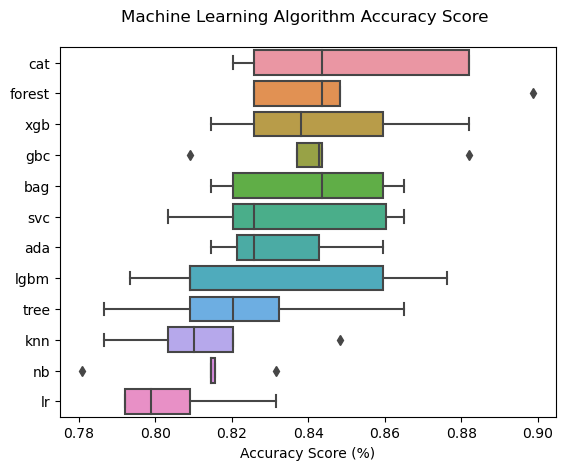

In [142]:
results = pd.DataFrame(scores2).T
results['mean'] = results.mean(1)
result_df = results.sort_values(by='mean', ascending=False)

result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')

## Bagging -> Voting

In [143]:
from sklearn.ensemble import VotingClassifier

In [144]:
grid_hard = VotingClassifier(estimators = list(models.items()),
                             voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, train_X, train_y, cv=cv_num)
grid_hard.fit(train_X, train_y)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

Hard voting on test set score mean: 84.29


In [145]:
grid_soft = VotingClassifier(estimators = list(models.items()),
                             voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, train_X, train_y, cv=cv_num)
grid_soft.fit(train_X, train_y)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean() * 100))

Soft voting on test set score mean: 83.39


## Stacking

In [147]:
stack = StackingClassifier(estimators=list(models.items()),
                           final_estimator=LogisticRegression(),
                           cv=10)

stack_cv = cross_val_score(stack, train_X, train_y, cv=cv_num)
stack.fit(train_X, train_y)

print("Stacking on test set score mean: {:.2f}". format(stack_cv.mean() * 100))

Stacking on test set score mean: 83.05


# 제출

In [151]:
pred = grid_hard.predict(test_X)
submission = pd.DataFrame({
        "PassengerId": passenger_id,
        "Survived": pred.astype(int)
    })
submission.to_csv(f'submission_hard_volting.csv', index=False)

In [152]:
pred = grid_soft.predict(test_X)
submission = pd.DataFrame({
        "PassengerId": passenger_id,
        "Survived": pred.astype(int)
    })
submission.to_csv(f'submission_soft_volting.csv', index=False)

In [153]:
pred = stack.predict(test_X)
submission = pd.DataFrame({
        "PassengerId": passenger_id,
        "Survived": pred.astype(int)
    })
submission.to_csv(f'submission_stacking.csv', index=False)

# Reference
- https://ko.wikipedia.org/wiki/RMS_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89
- https://www.kaggle.com/code/startupsci/titanic-data-science-solutions
- https://scikit-learn.org/stable/modules/classes.html
- https://xgboost.readthedocs.io/en/stable/parameter.html#
- https://lightgbm.readthedocs.io/en/v3.3.2/Parameters.html
- https://docs.aws.amazon.com/ko_kr/sagemaker/latest/dg/catboost-hyperparameters.html